## Importing Data and Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('./data/googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.shape

(10841, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## Data Cleaning and Pre-processing

In [6]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
data[data['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [9]:
data.iloc[10472,1:] = data.iloc[10472,1:].shift(1)
data.iloc[10472,:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

Since we know that the maximum rating that can be given for an app is 5, we checked for outliers and found out that one row’s values were all messed up. We fixed it by shifting them to the right. 

In [10]:
data.dropna(inplace=True)
data.shape

(9360, 13)

In [11]:
data.duplicated().value_counts()

False    8886
True      474
dtype: int64

In [12]:
data.drop_duplicates(inplace=True)
data.shape
data.reset_index(inplace=True, drop=True)
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8881,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
8882,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
8883,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
8884,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [13]:
data["App"].value_counts()

ROBLOX                                           9
8 Ball Pool                                      7
Bubble Shooter                                   6
Helix Jump                                       6
Zombie Catchers                                  6
                                                ..
Block City Wars + skins export                   1
KineMaster – Pro Video Editor                    1
Koi Live Wallpaper                               1
Geometry Dash Meltdown                           1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 8190, dtype: int64

We found inconsistencies when it came to certain apps. Different rows contained the same information about a single app but with a slightly different number of reviews.

In [14]:
data.loc[data['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1364,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1412,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1456,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1543,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1571,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1704,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1775,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1873,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
3891,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [15]:
data.drop_duplicates(subset = "App", inplace = True)

In [16]:
data['Last Updated']= pd.to_datetime(data['Last Updated'], format='%B %d, %Y')
data['Year Updated'] = data['Last Updated'].dt.year

In [17]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [18]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [19]:
data['Installs'] = data['Installs'].str.replace(r'\D','',regex=True).astype(int)
data['Price']=data['Price'].str.replace('$','',regex=True).astype(float)
data['Reviews']=data['Reviews'].astype(int)
data['Rating']=data['Rating'].astype(float)

After removing all non-digit characters, we converted the different columns which had “object” as their type to “int” or ”float” depending on the values. 

## Data Visualization

In [20]:
cleaned_data=data
cleaned_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8881,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up,2017
8882,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,2017
8883,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,2018
8884,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,2015


Text(0.5, 1.0, 'Distribution of Rating')

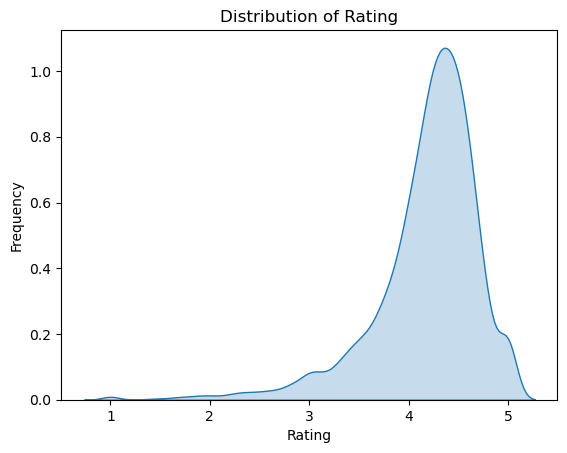

In [21]:
g= sns.kdeplot(cleaned_data.Rating, shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating')

We can see that the majority of the apps received a high rating.

Text(0.5, 1.0, 'Installs per Category')

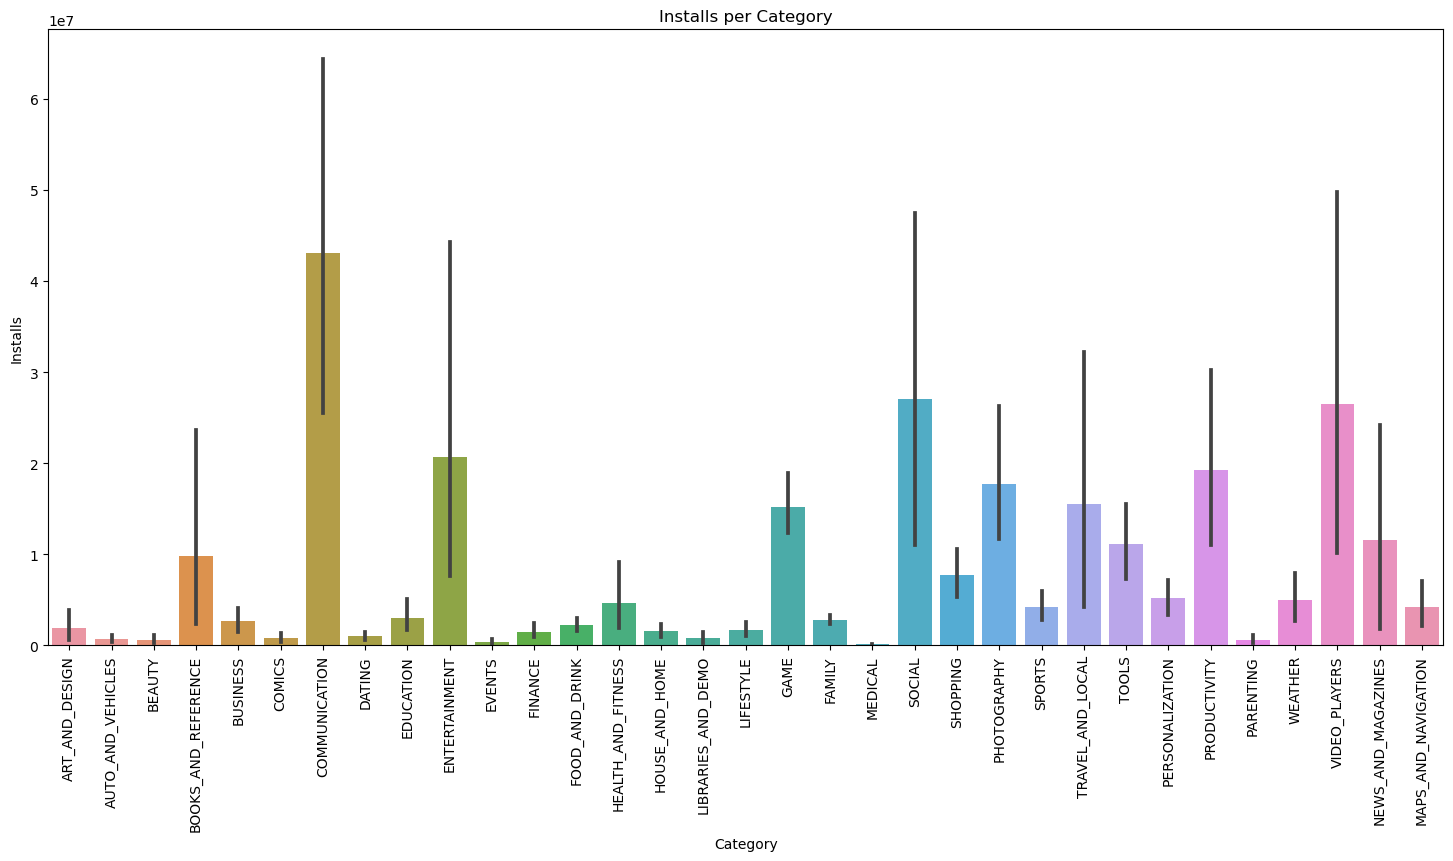

In [22]:
plt.subplots(figsize=(18,8))
plt.xticks(rotation=90)
sns.barplot(x='Category',y='Installs',data=cleaned_data)
plt.title('Installs per Category')

Communication category is the most installed category, followed by the social category(Instagram, Facebook,...)

In [23]:
typedf=cleaned_data.filter(['Type'],axis=1)
typedf=typedf.groupby(['Type']).size().to_frame()
typedf=typedf.rename(columns={0:'count'})
typedf

,count
Type,
Free,7588
Paid,602


array([<AxesSubplot:ylabel='count'>], dtype=object)

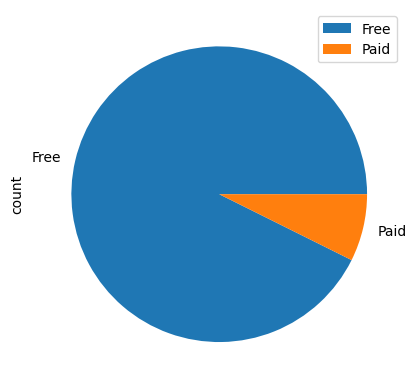

In [24]:
t=typedf.sort_values(by='Type')
t.plot.pie(subplots=True)

Most apps are free.

<AxesSubplot:xlabel='Content Rating', ylabel='Installs'>

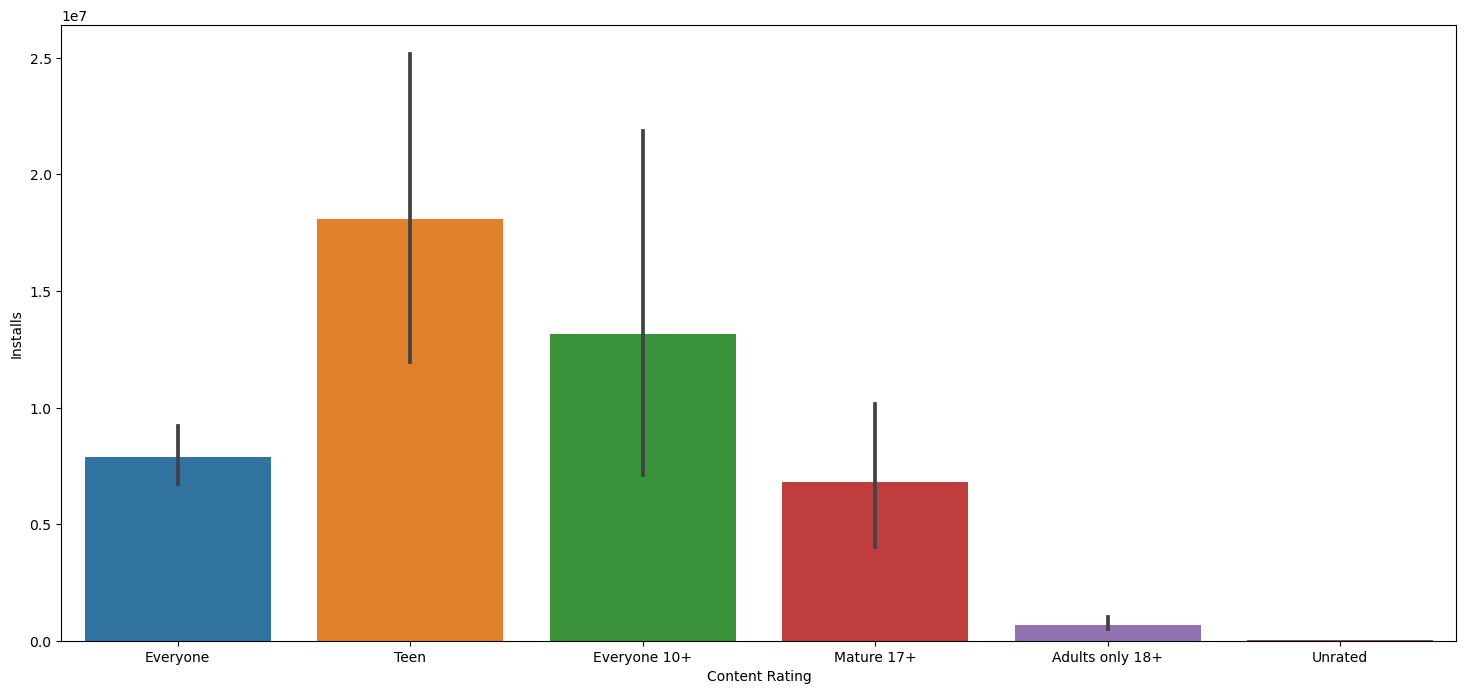

In [25]:
plt.subplots(figsize=(18,8))
plt.xticks()
sns.barplot(x='Content Rating',y='Installs',data=cleaned_data)

The most installed apps belonged to the teen category.

In [26]:
data.drop(['App', 'Current Ver','Android Ver','Last Updated'], axis = 1, inplace = True)

In [27]:
def encode(feature):
    label_encoding = preprocessing.LabelEncoder()
    new = label_encoding.fit_transform(feature.astype(str))
    return new

In [28]:
data['Type'] = encode(data['Type'])
#data['Category'] = encode(data['Category'])
#data['Content Rating'] = encode(data['Content Rating'])

In [29]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [30]:
data['Size'].replace('Varies with device', np.nan, inplace = True ) 

One of the values in the “Size” column is “Varies with device”. We changed that to nan and proceeded to fill them later on with the average size of the category they belong to.

In [31]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'k' in x:
        return float(x.replace('k', ''))*1000        
    if 'M' in x:
        return float(x.replace('M', '')) * 1000000
        
data['Size'] = data['Size'].apply(value_to_float)

We used the above function to convert k and M to numerical form.

In [32]:
data.isna().sum()

Category             0
Rating               0
Reviews              0
Size              1169
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Year Updated         0
dtype: int64

In [33]:
data.dtypes

Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type                int32
Price             float64
Content Rating     object
Genres             object
Year Updated        int64
dtype: object

In [34]:
 data['Size'].fillna(data.groupby('Category')['Size'].transform('mean'),inplace = True)

In [35]:
data['Size'] =(data['Size']-data['Size'].min())/(data['Size'].max()-data['Size'].min())

 In addition, we normalized the 'size' column to get values between 0 and 1.

<AxesSubplot:>

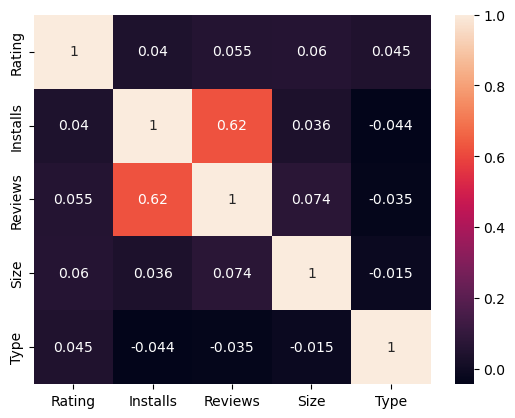

In [36]:
df =data.loc[:,['Rating', 'Installs','Reviews','Size','Type', 'Category']]
df=df.corr()
sns.heatmap(df, annot=True)

The heatmap shows the correlation between the different variables.

## Classification and Prediction of an app's success

In [37]:
genredf = data['Genres'].str.get_dummies(sep=';')
df = pd.concat([data,genredf],axis=1)
df.drop(labels = ['Genres'], axis = 1, inplace = True)
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Year Updated,Action,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,ART_AND_DESIGN,4.1,159,0.189931,10000,0,0.0,Everyone,2018,0,...,0,0,0,0,0,0,0,0,0,0
1,ART_AND_DESIGN,3.9,967,0.139927,500000,0,0.0,Everyone,2018,0,...,0,0,0,0,0,0,0,0,0,0
2,ART_AND_DESIGN,4.7,87510,0.086922,5000000,0,0.0,Everyone,2018,0,...,0,0,0,0,0,0,0,0,0,0
3,ART_AND_DESIGN,4.5,215644,0.249936,50000000,0,0.0,Teen,2018,0,...,0,0,0,0,0,0,0,0,0,0
4,ART_AND_DESIGN,4.3,967,0.027917,100000,0,0.0,Everyone,2018,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8881,FAMILY,4.0,7,0.025917,500,0,0.0,Everyone,2017,0,...,0,0,0,0,0,0,0,0,0,0
8882,FAMILY,4.5,38,0.529960,5000,0,0.0,Everyone,2017,0,...,0,0,0,0,0,0,0,0,0,0
8883,FAMILY,5.0,4,0.035918,100,0,0.0,Everyone,2018,0,...,0,0,0,0,0,0,0,0,0,0
8884,BOOKS_AND_REFERENCE,4.5,114,0.141595,1000,0,0.0,Mature 17+,2015,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
categorydf = df['Category'].str.get_dummies(sep=';')
df = pd.concat([df,categorydf],axis=1)
df.drop(labels = ['Category'], axis = 1, inplace = True)
df

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Year Updated,Action,Action & Adventure,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,4.1,159,0.189931,10000,0,0.0,Everyone,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,0.139927,500000,0,0.0,Everyone,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,0.086922,5000000,0,0.0,Everyone,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,0.249936,50000000,0,0.0,Teen,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,0.027917,100000,0,0.0,Everyone,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8881,4.0,7,0.025917,500,0,0.0,Everyone,2017,0,0,...,0,0,0,0,0,0,0,0,0,0
8882,4.5,38,0.529960,5000,0,0.0,Everyone,2017,0,0,...,0,0,0,0,0,0,0,0,0,0
8883,5.0,4,0.035918,100,0,0.0,Everyone,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
8884,4.5,114,0.141595,1000,0,0.0,Mature 17+,2015,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
contentdf = df['Content Rating'].str.get_dummies(sep=';')
df = pd.concat([df,contentdf],axis=1)
df.drop(labels = ['Content Rating'], axis = 1, inplace = True)
df

,Rating,Reviews,Size,Installs,Type,Price,Year Updated,Action,Action & Adventure,Adventure,...,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,4.1,159,0.189931,10000,0,0.0,2018,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,967,0.139927,500000,0,0.0,2018,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,87510,0.086922,5000000,0,0.0,2018,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4.5,215644,0.249936,50000000,0,0.0,2018,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.3,967,0.027917,100000,0,0.0,2018,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8881,4.0,7,0.025917,500,0,0.0,2017,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8882,4.5,38,0.529960,5000,0,0.0,2017,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8883,5.0,4,0.035918,100,0,0.0,2018,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8884,4.5,114,0.141595,1000,0,0.0,2015,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
df.loc[data['Installs'] < 1000000, 'Installs'] = 0
df.loc[data['Installs'] >= 1000000, 'Installs'] = 1

We split the installs values into two classes (below 1M and above 1M)

In [41]:
df['Installs'].value_counts().sort_index()

0    4798
1    3392
Name: Installs, dtype: int64

In [42]:
X = df.drop('Installs', axis=1)
Y = df['Installs']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

We started by trying the Logistic Regression model and compared the predicted results with the actual test data. After displaying the confusion matrix, we computed the accuracy, precision, and recall score, first by using scikit-learn then manually. 

In [43]:
logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

In [44]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})
pred_results

,y_test,y_pred
3886,0,0
4048,1,1
607,1,1
6009,1,1
857,1,0
...,...,...
396,1,1
6925,0,0
3612,0,0
5229,1,1


In [45]:
dfcross=pd.crosstab(pred_results.y_pred, pred_results.y_test)
dfcross

y_test,0,1
y_pred,,
0,933,97
1,23,585


In [46]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.9267399267399268
precision_score :  0.962171052631579
recall_score :  0.8577712609970675


In [47]:
TP = dfcross[1][1]
TN = dfcross[0][0]
FP = dfcross[0][1]
FN = dfcross[1][0]

In [48]:
accuracy_score_verified = (TP + TN) / (TP + FP + TN + FN)

accuracy_score_verified

0.9267399267399268

In [49]:
precision_score_success = TP / (TP + FP)

precision_score_success

0.962171052631579

In [50]:
recall_score_success = TP / (TP + FN)

recall_score_success

0.8577712609970675

In [51]:
df

,Rating,Reviews,Size,Installs,Type,Price,Year Updated,Action,Action & Adventure,Adventure,...,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,4.1,159,0.189931,0,0,0.0,2018,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,967,0.139927,0,0,0.0,2018,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,87510,0.086922,1,0,0.0,2018,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4.5,215644,0.249936,1,0,0.0,2018,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.3,967,0.027917,0,0,0.0,2018,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8881,4.0,7,0.025917,0,0,0.0,2017,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8882,4.5,38,0.529960,0,0,0.0,2017,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8883,5.0,4,0.035918,0,0,0.0,2018,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8884,4.5,114,0.141595,0,0,0.0,2015,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In order to simplify our work, we defined a function to train different models and compare their accuracy, recall, and precision scores.

In [52]:
def evaluate_models(models, X_train, y_train, X_test, y_test):
    
    results = {}
    
    for name, model in models.items():
        
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_recall = recall_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        
        test_recall = recall_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        results[name] = {
            'train_recall': train_recall,
            'train_precision': train_precision,
            'train_accuracy': train_accuracy,
            'test_recall': test_recall,
            'test_precision': test_precision,
            'test_accuracy': test_accuracy
        }
        
    return results


In [53]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(solver='svd'),
    'SGD Classifier':SGDClassifier(),
    'Linear SVC':LinearSVC(C=1.0, max_iter=1000, tol=1e-3, dual=False),
    'GaussianNB':GaussianNB(priors=None)
}


results = evaluate_models(models, x_train, y_train, x_test, y_test)


for name, result in results.items():
    print(name)
    print('\nTrain recall:', result['train_recall'])
    print('Train precision:', result['train_precision'])
    print('Train accuracy:', result['train_accuracy'])
    print('\nTest recall:', result['test_recall'])
    print('Test precision:', result['test_precision'])
    print('Test accuracy:', result['test_accuracy'])
    print('------------------------------------')


Decision Tree

Train recall: 1.0
Train precision: 1.0
Train accuracy: 1.0

Test recall: 0.907624633431085
Test precision: 0.9102941176470588
Test accuracy: 0.9242979242979243
------------------------------------
Logistic Regression

Train recall: 0.8535055350553505
Train precision: 0.9495073891625616
Train accuracy: 0.9206349206349206

Test recall: 0.8577712609970675
Test precision: 0.962171052631579
Test accuracy: 0.9267399267399268
------------------------------------
Linear Discriminant Analysis

Train recall: 0.6276752767527676
Train precision: 0.6974169741697417
Train accuracy: 0.7333638583638583

Test recall: 0.6334310850439883
Test precision: 0.663594470046083
Test accuracy: 0.7136752136752137
------------------------------------
SGD Classifier

Train recall: 0.9922509225092251
Train precision: 0.7787431219229656
Train accuracy: 0.8801892551892552

Test recall: 0.9897360703812317
Test precision: 0.78125
Test accuracy: 0.8803418803418803
------------------------------------
Linea

We decided to do hyperparameter tuning on the models that could give us the highest scores. We chose the Logistic Regression, the SGD Classifier, and the Decision Tree Classifier because it was clearly overfitted.

In [54]:
def tune_models(models, params, X_train, y_train):
 
    best_params = {}
    
    for name, model in models.items():
        
        param_grid = params[name]
        
        grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        
        best_params[name] = grid_search.best_params_
        
    return best_params


In [57]:
models_hyper = {
    'Decision Tree' : DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'SGD Classifier':SGDClassifier(),
}

params = {
    'Decision Tree' : {'max_depth': [2,3, 4, 5, 6]},
    'Logistic Regression': {'C': [0.01,0.1,0.5, 1, 10]},
    'SGD Classifier': {'max_iter': [100, 1000, 10000],'tol': (1e-6, 1e-3)},
}

best_params = tune_models(models_hyper, params, x_train, y_train)

for name, params in best_params.items():
    print(name)
    print(params)
    print('------------------------------------')

Decision Tree
{'max_depth': 4}
------------------------------------
Logistic Regression
{'C': 0.01}
------------------------------------
SGD Classifier
{'max_iter': 100, 'tol': 0.001}
------------------------------------


In [58]:
models_hyper = {
    'Decision Tree': DecisionTreeClassifier(max_depth=4),
    'Logistic Regression': LogisticRegression(solver='liblinear',C=0.01),
    'SGD Classifier':SGDClassifier(max_iter=100,tol=1e-3),
}


results = evaluate_models(models_hyper, x_train, y_train, x_test, y_test)


for name, result in results.items():
    print(name)
    print('\nTrain recall:', result['train_recall'])
    print('Train precision:', result['train_precision'])
    print('Train accuracy:', result['train_accuracy'])
    print('\nTest recall:', result['test_recall'])
    print('Test precision:', result['test_precision'])
    print('Test accuracy:', result['test_accuracy'])
    print('------------------------------------')


Decision Tree

Train recall: 0.9247232472324723
Train precision: 0.9467321496033245
Train accuracy: 0.9473443223443223

Test recall: 0.9164222873900293
Test precision: 0.9455370650529501
Test accuracy: 0.9432234432234432
------------------------------------
Logistic Regression

Train recall: 0.8535055350553505
Train precision: 0.9495073891625616
Train accuracy: 0.9206349206349206

Test recall: 0.8577712609970675
Test precision: 0.962171052631579
Test accuracy: 0.9267399267399268
------------------------------------
SGD Classifier

Train recall: 0.8586715867158672
Train precision: 0.9474755700325733
Train accuracy: 0.9218559218559218

Test recall: 0.8636363636363636
Test precision: 0.9608482871125612
Test accuracy: 0.9285714285714286
------------------------------------


High accuracy, precision, and recall, and no case of overfitting!